## On Balance Volumne (OBV) Indicator
> By Srishti Singh

In [1]:
# importing libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import scipy.stats as stats
import numpy as np

In [2]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(365)

In [3]:
def get_data(ticker):
  asset = pdr.get_data_yahoo(ticker + '.NS', start = start_date, end = end_date)
  asset.reset_index(inplace = True)
  return asset

In [4]:
hdfc = get_data('HDFCBANK')
hdfc

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,1472.000000,1498.000000,1467.250000,1496.699951,1479.730591,6415264
1,2022-11-01,1503.500000,1529.000000,1498.900024,1513.250000,1496.093018,9536878
2,2022-11-02,1517.000000,1528.250000,1511.599976,1514.199951,1497.032104,6360203
3,2022-11-03,1497.699951,1520.250000,1497.000000,1507.550049,1490.457642,5166176
4,2022-11-04,1503.199951,1516.099976,1489.599976,1497.150024,1480.175537,5409030
...,...,...,...,...,...,...,...
242,2023-10-20,1505.000000,1527.000000,1505.000000,1522.800049,1522.800049,10547005
243,2023-10-23,1523.500000,1528.750000,1500.099976,1506.050049,1506.050049,11188068
244,2023-10-25,1521.000000,1522.800049,1491.449951,1496.500000,1496.500000,14155998
245,2023-10-26,1491.250000,1492.000000,1460.250000,1463.400024,1463.400024,27780899


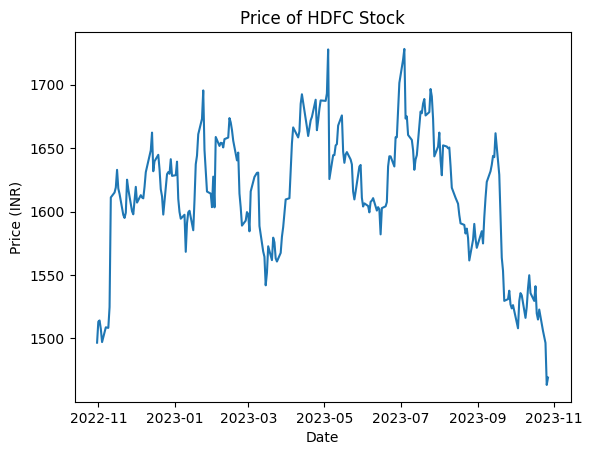

In [5]:
plt.plot(hdfc['Date'], hdfc['Close'])
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.title('Price of HDFC Stock')
plt.show()

In [6]:
obv = [0]
for i in range(1, len(hdfc.Close)):
  if hdfc.Close[i] > hdfc.Close[i - 1]:
    obv.append(obv[-1] + hdfc.Volume[i])
  elif hdfc.Close[i] < hdfc.Close[i - 1]:
    obv.append(obv[-1] - hdfc.Volume[i])
  else:
    obv.append(0)
obv

[0,
 9536878,
 15897081,
 10730905,
 5321875,
 10239792,
 5604897,
 11991988,
 40353157,
 49950852,
 55465953,
 62255028,
 56204563,
 50974947,
 46802539,
 42529382,
 47622251,
 56221231,
 52015983,
 43962993,
 37643875,
 45236278,
 55459461,
 51553922,
 57350233,
 51173687,
 45336327,
 52738144,
 58719836,
 65937240,
 74453091,
 81566911,
 72475587,
 79799566,
 84601837,
 81014488,
 76379889,
 71506341,
 66159765,
 71113426,
 75076812,
 70730877,
 76237325,
 72676005,
 74866694,
 79055709,
 73879909,
 68409191,
 63862960,
 69227630,
 61041747,
 68639646,
 73264681,
 77886954,
 70512907,
 75906084,
 85451405,
 91037486,
 100459188,
 108181388,
 120673358,
 113321287,
 95731313,
 86474902,
 77176780,
 85828175,
 77079622,
 84285172,
 78701336,
 83833630,
 79611217,
 73722549,
 77808607,
 80677079,
 86131375,
 80412019,
 76380769,
 71902634,
 67859281,
 74053929,
 68874378,
 54933373,
 46402503,
 53558989,
 63055985,
 55987357,
 47291450,
 54784567,
 68286922,
 78336809,
 88686892,
 7499

In [7]:
hdfc['OBV'] = obv
hdfc

,Date,Open,High,Low,Close,Adj Close,Volume,OBV
0,2022-10-31,1472.000000,1498.000000,1467.250000,1496.699951,1479.730591,6415264,0
1,2022-11-01,1503.500000,1529.000000,1498.900024,1513.250000,1496.093018,9536878,9536878
2,2022-11-02,1517.000000,1528.250000,1511.599976,1514.199951,1497.032104,6360203,15897081
3,2022-11-03,1497.699951,1520.250000,1497.000000,1507.550049,1490.457642,5166176,10730905
4,2022-11-04,1503.199951,1516.099976,1489.599976,1497.150024,1480.175537,5409030,5321875
...,...,...,...,...,...,...,...,...
242,2023-10-20,1505.000000,1527.000000,1505.000000,1522.800049,1522.800049,10547005,-100262226
243,2023-10-23,1523.500000,1528.750000,1500.099976,1506.050049,1506.050049,11188068,-111450294
244,2023-10-25,1521.000000,1522.800049,1491.449951,1496.500000,1496.500000,14155998,-125606292
245,2023-10-26,1491.250000,1492.000000,1460.250000,1463.400024,1463.400024,27780899,-153387191


In [8]:
hdfc['OBV_EMA'] = hdfc['OBV'].ewm(span = 20).mean()
hdfc

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA
0,2022-10-31,1472.000000,1498.000000,1467.250000,1496.699951,1479.730591,6415264,0,0.000000e+00
1,2022-11-01,1503.500000,1529.000000,1498.900024,1513.250000,1496.093018,9536878,9536878,5.006861e+06
2,2022-11-02,1517.000000,1528.250000,1511.599976,1514.199951,1497.032104,6360203,15897081,9.005684e+06
3,2022-11-03,1497.699951,1520.250000,1497.000000,1507.550049,1490.457642,5166176,10730905,9.503729e+06
4,2022-11-04,1503.199951,1516.099976,1489.599976,1497.150024,1480.175537,5409030,5321875,8.492174e+06
...,...,...,...,...,...,...,...,...,...
242,2023-10-20,1505.000000,1527.000000,1505.000000,1522.800049,1522.800049,10547005,-100262226,-9.769555e+07
243,2023-10-23,1523.500000,1528.750000,1500.099976,1506.050049,1506.050049,11188068,-111450294,-9.900552e+07
244,2023-10-25,1521.000000,1522.800049,1491.449951,1496.500000,1496.500000,14155998,-125606292,-1.015389e+08
245,2023-10-26,1491.250000,1492.000000,1460.250000,1463.400024,1463.400024,27780899,-153387191,-1.064769e+08


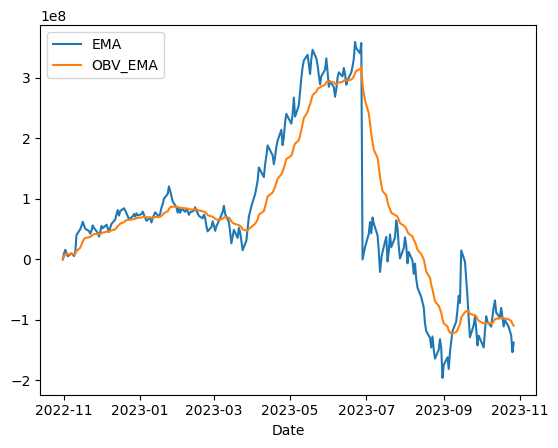

In [9]:
plt.plot(hdfc['Date'], hdfc['OBV'], label = 'EMA')
plt.plot(hdfc['Date'], hdfc['OBV_EMA'], label = 'OBV_EMA')
plt.xlabel('Date')
plt.legend(loc = 'upper left')
plt.show()

In [10]:
def buy_sell(ticker, obv, obv_ema):
  sigprice_buy = []
  sigprice_sell = []
  flag = -1 # a flag for the trend upward/downward
  for i in range(0,len(ticker)):
      if ticker[obv][i] > ticker[obv_ema][i] and flag != 1:
          sigprice_buy.append(ticker['Close'][i])
          sigprice_sell.append(np.nan)
          flag = 1
      #else  if OBV < OBV_EMA  and flag != 0 then sell else buy
      elif ticker[obv][i] < ticker[obv_ema][i] and flag != 0:
          sigprice_sell.append(ticker['Close'][i])
          sigprice_buy.append(np.nan)
          flag = 0
      #else append NaN
      else:
        sigprice_buy.append(np.nan)
        sigprice_sell.append(np.nan)

  return (sigprice_buy, sigprice_sell)


In [11]:
sig = buy_sell(hdfc, 'OBV', 'OBV_EMA')
sig

([nan,
  1513.25,
  nan,
  nan,
  nan,
  1508.800048828125,
  nan,
  1524.75,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1608.449951171875,
  nan,
  nan,
  nan,
  nan,
  nan,
  1619.5,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1599.4000244140625,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1673.699951171875,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1627.300048828125,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1580.199951171875,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
 

In [12]:
hdfc['Buy_Signal_Price'] = sig[0]
hdfc['Sell_Signal_Price'] = sig[1]
hdfc

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
0,2022-10-31,1472.000000,1498.000000,1467.250000,1496.699951,1479.730591,6415264,0,0.000000e+00,NaN,NaN
1,2022-11-01,1503.500000,1529.000000,1498.900024,1513.250000,1496.093018,9536878,9536878,5.006861e+06,1513.25,NaN
2,2022-11-02,1517.000000,1528.250000,1511.599976,1514.199951,1497.032104,6360203,15897081,9.005684e+06,NaN,NaN
3,2022-11-03,1497.699951,1520.250000,1497.000000,1507.550049,1490.457642,5166176,10730905,9.503729e+06,NaN,NaN
4,2022-11-04,1503.199951,1516.099976,1489.599976,1497.150024,1480.175537,5409030,5321875,8.492174e+06,NaN,1497.150024
...,...,...,...,...,...,...,...,...,...,...,...
242,2023-10-20,1505.000000,1527.000000,1505.000000,1522.800049,1522.800049,10547005,-100262226,-9.769555e+07,NaN,NaN
243,2023-10-23,1523.500000,1528.750000,1500.099976,1506.050049,1506.050049,11188068,-111450294,-9.900552e+07,NaN,NaN
244,2023-10-25,1521.000000,1522.800049,1491.449951,1496.500000,1496.500000,14155998,-125606292,-1.015389e+08,NaN,NaN
245,2023-10-26,1491.250000,1492.000000,1460.250000,1463.400024,1463.400024,27780899,-153387191,-1.064769e+08,NaN,NaN


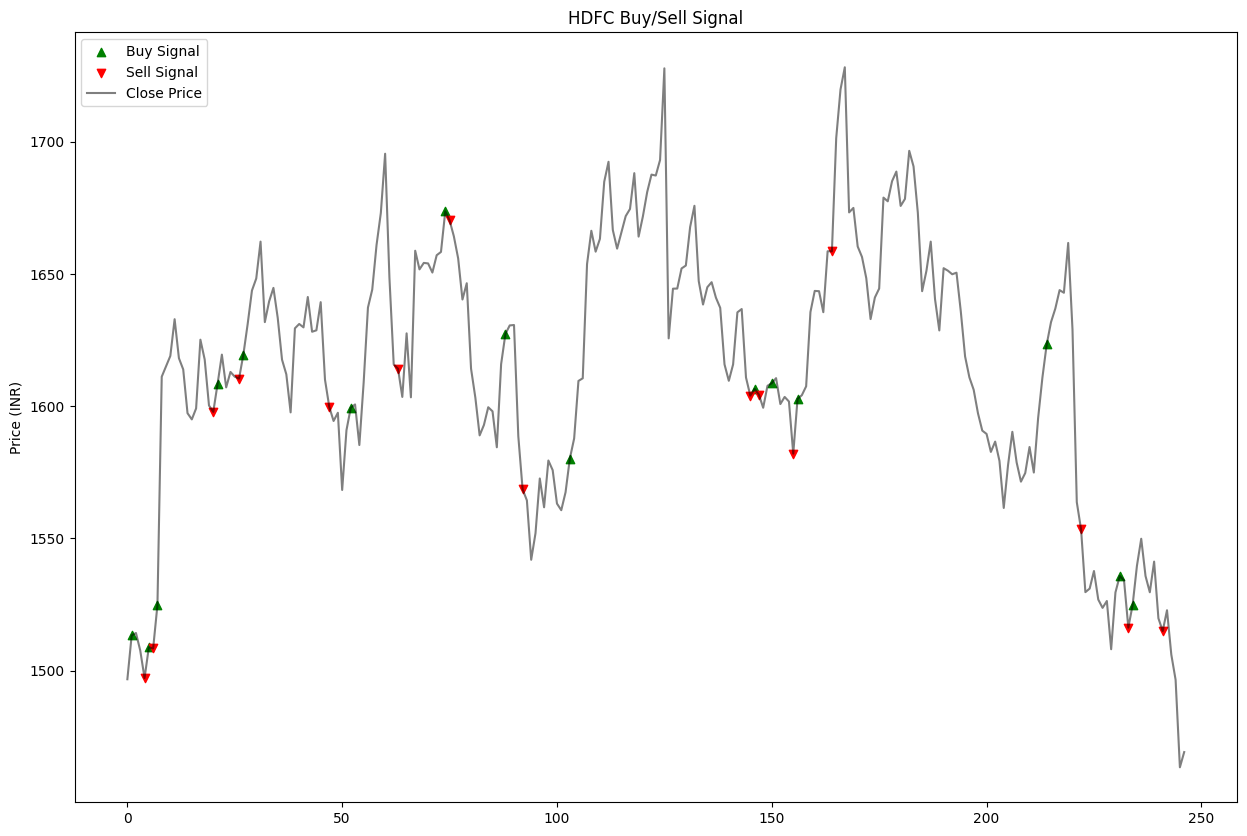

In [14]:
plt.figure(figsize = (15, 10))
plt.scatter(hdfc.index, hdfc['Buy_Signal_Price'], color = 'green', label = 'Buy Signal', marker = '^')
plt.scatter(hdfc.index, hdfc['Sell_Signal_Price'], color = 'red', label = 'Sell Signal', marker = 'v')
plt.plot(hdfc['Close'], label = 'Close Price', color = 'black', alpha = 0.5)
plt.title('HDFC Buy/Sell Signal')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left')
plt.show()